# **Introduction**

**i.** 5 examples of ML methods application in life. What is the benefit of using machine learning methods in each of these examples?

| method | benefit |
| :- | :- |
| recommend book that a person might like based on his/her preferences | unobvious suggestions |
| predict amount of perishable goods that a shop should prepare | prevent spoiling of goods  |
| smart alarm clock | define the best time to wake up and feel good |
| target association | more efficient for bussines and more interesting for a customer |
| advisor system for doctors | suggest possible diagnosis |

**ii.** Use classification of tasks in the introduction to decide what class you can assign for the tasks from the table above and for the 5 examples you provided.

| task | classification |
| :- | :- |
| recommend book that a person might like based on his/her preferences | association |
| predict amount of perishable goods that a shop should prepare | regression |
| smart alarm clock | regression |
| target advertisment | association |
| advisor system for doctors | association |
| 1. Predict house price | regression |
| 2. Predict whether a client returns a loan | binary classification |
| 3. Predict when a patient needs to take medicine | regression |
| 4. Choose what medicine out of available a patient should take | classification |
| 5. Choose segment of clients for a promo communication | clustering |
| 6. Recognition of defective products on the production line (based on photo scans) | classification |
| 7. Decide how to place products on a shelf in a store | association |
| 8. Search sites for input text query | association |
| 9. Split customers of a store into segments to understand differences of their behavior | clustering |
| 10. Detect anomaly in site traffic | generalization |


**iii.** What is the difference between multiclass and multilabel?

**Multiclass** implies that input may relate only to one class, which was chosen among several classes. For example, recognize an animal on the picture.

**Multilabel** indicates that input may refer to several labels at the same time, they are not contradictory. For instance, scientific article might be associated with Maths and Computer Science.

**iv.** Is an example case with housing prices from theory a classification of a regression problem? Is it possible to reduce the regression problem to classification?

Housing prices is a classification problem, but it is possible to reduce it to classification if we try to identify the range of the price among several ranges (which might be named, for example, 'cheap', 'expensive', 'economical').

# **Intro data analysis**

**i.** Import libraries

In [366]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, linear_model, metrics, tree, model_selection
import scipy
import statsmodels
import matplotlib.pyplot as plt
import seaborn as sb

**ii.** Load data from kaggle with pandas.

In [367]:
df = pd.read_json('data/train.json.zip', compression='zip')
print(df.columns)

Index(['bathrooms', 'bedrooms', 'building_id', 'created', 'description',
       'display_address', 'features', 'latitude', 'listing_id', 'longitude',
       'manager_id', 'photos', 'price', 'street_address', 'interest_level'],
      dtype='object')


**iii.** What is the size of your data?

In [368]:
df.size # rows * colums

740280

In [369]:
rows = len(df.index)
columns = len(df.columns)
print(rows, columns)

49352 15


In [370]:
df.shape # tuple representing the dimensionality of the DataFrame

(49352, 15)

**iv.** Print the list of columns. Which column is a target?

In [371]:
list(df.columns)

['bathrooms',
 'bedrooms',
 'building_id',
 'created',
 'description',
 'display_address',
 'features',
 'latitude',
 'listing_id',
 'longitude',
 'manager_id',
 'photos',
 'price',
 'street_address',
 'interest_level']

**'price'** is the target

**v.** Make a fast analysis of the data: use methods info(), describe(), corr(). Explain the results of outputs. Are there any empty columns?

In [372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


There are **no empty** lines (Non-Null rows of each column equal to total number of rows)

**vi.** We’ll work only with 3 features: 'bathrooms', 'bedrooms', 'interest_level' and with target column ‘price’. Make a dataframe with these columns only.

In [373]:
df.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


**mean** - average of a data set

**std** - standard deviation

**25%, 50%, 75%** - percentiles

In [374]:
# corr() might be applied only to columns that contain numeric values
df[['bathrooms', 'bedrooms',  'price', 'latitude', 'listing_id', 'longitude']].corr()

,bathrooms,bedrooms,price,latitude,listing_id,longitude
bathrooms,1.000000,0.533446,0.069661,-0.009657,0.000776,0.010393
bedrooms,0.533446,1.000000,0.051788,-0.004745,0.011968,0.006892
price,0.069661,0.051788,1.000000,-0.000707,0.008090,-0.000087
latitude,-0.009657,-0.004745,-0.000707,1.000000,0.001712,-0.966807
listing_id,0.000776,0.011968,0.008090,0.001712,1.000000,-0.000907
longitude,0.010393,0.006892,-0.000087,-0.966807,-0.000907,1.000000


If correlation tends to 1, the link between feature and target is strong. The most significant correlation is between price and bathrooms.

We’ll work only with 3 features: 'bathrooms', 'bedrooms', 'interest_level' and with target column ‘price’. Make a dataframe with these columns only.

In [375]:
df = df[['bathrooms', 'bedrooms', 'interest_level', 'price']]

# Statistical data analysis

**i.** To start with statistical data analysis we recommend you refresh basic knowledge of statistics, such as Mean / Median / Mode / Variance / Standard Deviation. Also you are welcome to be free with distributions (Discrete uniform Distribution, Bernoulli Distribution, Binomial Distribution, Poisson Distribution, Normal Distribution, Exponential Distribution). Please make sure that you know the definitions of outliers, percentiles, confidential intervals.

**ii.** Make a quick sense with this article. Please take attention to such aspects as distributions and histograms, boxplot, outliers, kernel density function.

**iii.** Target analysis

**a.** Plot a histogram to understand the distribution of the target. Is it all clear?

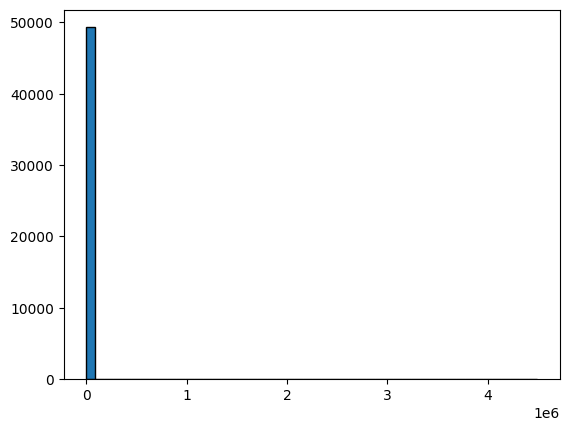

In [376]:
data = df['price']
plt.hist(data, edgecolor="black", bins=50)
plt.show()
# the distribution is not clear

**b.** The next step is boxplot(). What can you say about target? Are there any outliers?

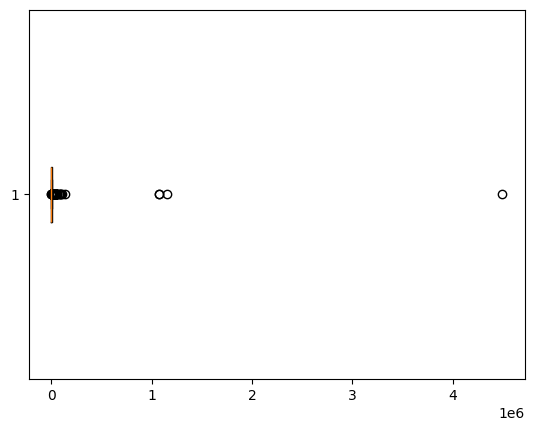

In [377]:
plt.boxplot(data, vert=False)
plt.show()
# There are some outliers(white dots)

**c.** Drop rows which are out of the 1 and 99 percentile by the target column.

In [378]:
upper_q = df['price'].quantile(0.99)
lower_q = df['price'].quantile(0.01)
df['price'] = df['price'][(df['price'] < upper_q) & (df['price'] > lower_q)]

**d.** Plot a histogram for price again. Explain the result.

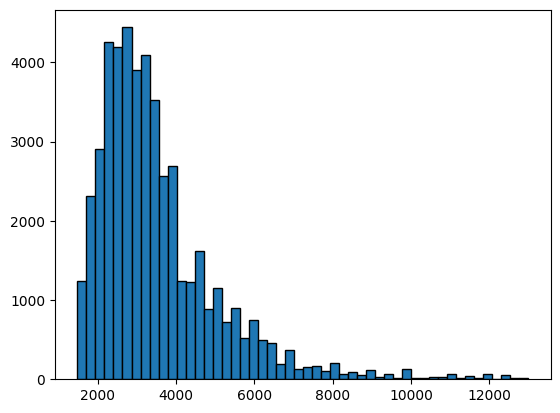

In [379]:
data = df['price']
plt.hist(data, edgecolor="black", bins=50)
plt.show()
# Result without outliers became clearer, more distributed

**iv.** Features analysis

**a.** What is the type of column 'interest_level'?

In [380]:
print(df['interest_level'].dtype)

object


**b.** Print the values of this column. How many items each value contains?

In [381]:
df['interest_level'].unique()

array(['medium', 'low', 'high'], dtype=object)

**c.** Decode these values. For example, you may replace each value to 0, 1 or 2.

In [382]:
df['interest_level'].value_counts()

interest_level
low       34284
medium    11229
high       3839
Name: count, dtype: int64

In [383]:
# replace values: low = 0, medium = 1, high = 2
df['interest_level'] = df['interest_level'].replace(['low', 'medium', 'high'], [0, 1, 2])

# prevent warnings
df['interest_level'].infer_objects(copy=False)
pd.set_option('future.no_silent_downcasting', True)

**d.** Plot histograms for features 'bathrooms', 'bedrooms'. Are there outliers?

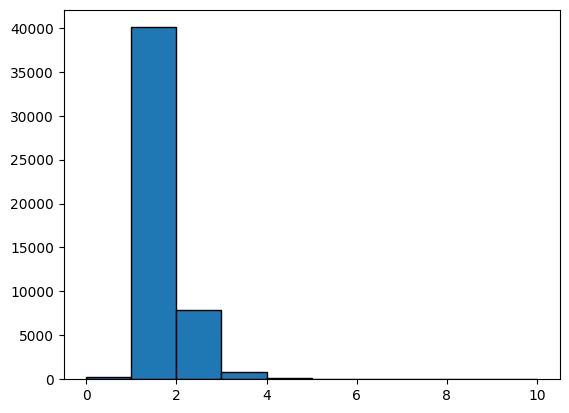

In [384]:
data = df['bathrooms']
plt.hist(data, edgecolor="black", bins=10)
plt.show()

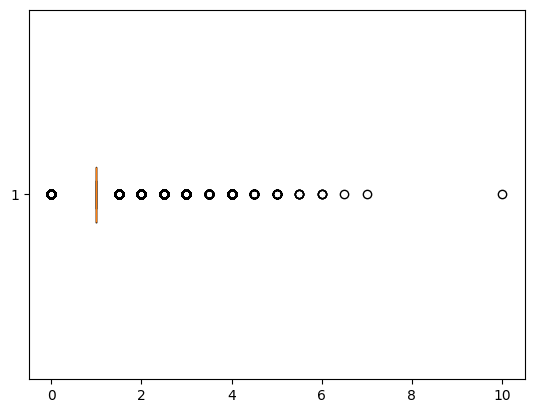

In [385]:
data = df['bathrooms']
plt.boxplot(data, vert=False)
plt.show()

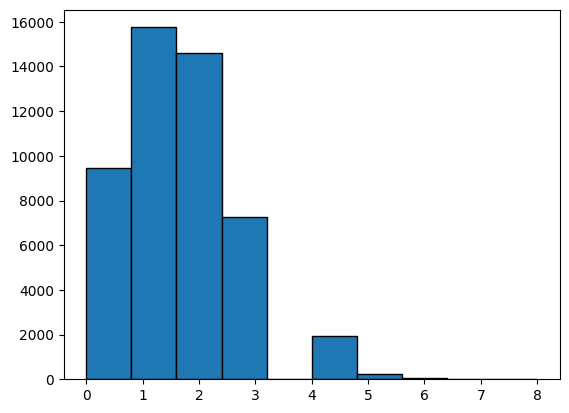

In [386]:
data = df['bedrooms']
plt.hist(data, edgecolor="black", bins=10)
plt.show()

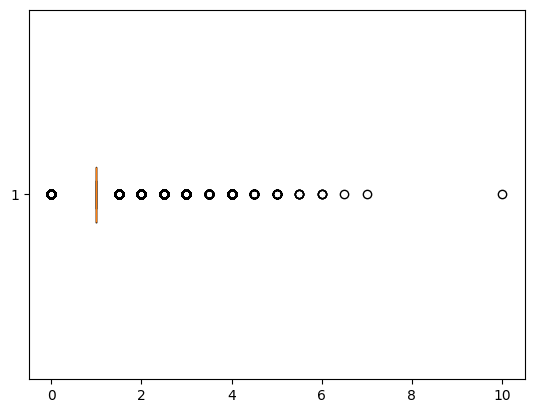

In [387]:
data = df['bathrooms']
plt.boxplot(data, vert=False)
plt.show()

**Answer:** There are **no outliers** both in bathrooms and bedrooms histograms

**v.** Complex analysis

**a.** Plot a correlation matrix to understand correlation between features and target. Plot a heatmap plot for correlation matrix. Is there a correlation?

In [388]:
correlation_matrix = df[['bathrooms', 'bedrooms', 'interest_level', 'price']].corr()
print(correlation_matrix)

                bathrooms  bedrooms  interest_level     price
bathrooms        1.000000  0.533446       -0.082573  0.670808
bedrooms         0.533446  1.000000        0.027293  0.547310
interest_level  -0.082573  0.027293        1.000000 -0.199652
price            0.670808  0.547310       -0.199652  1.000000


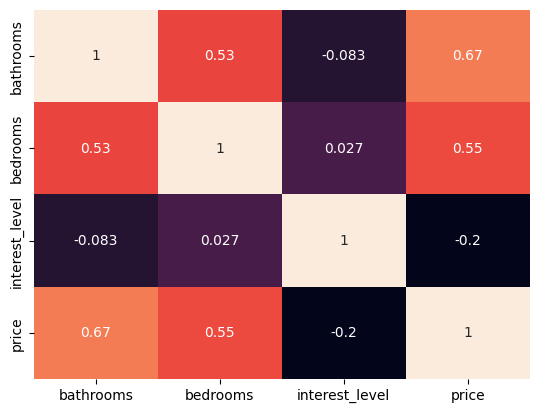

In [389]:
sb.heatmap(correlation_matrix, annot=True, cbar=False)
plt.show()

The strongest correlation is between **price and bathrooms**

**b.** Use a scatter plot to visualize correlation between features and target. You should return 3 plots, where X axis it target, and Y axis is a feature.

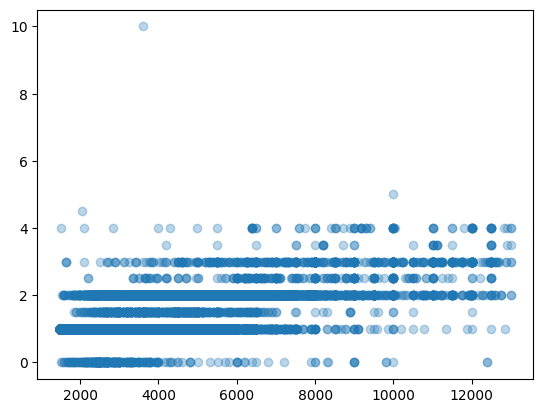

In [390]:
plt.scatter(df['price'], df['bathrooms'], alpha=0.3)
plt.show()

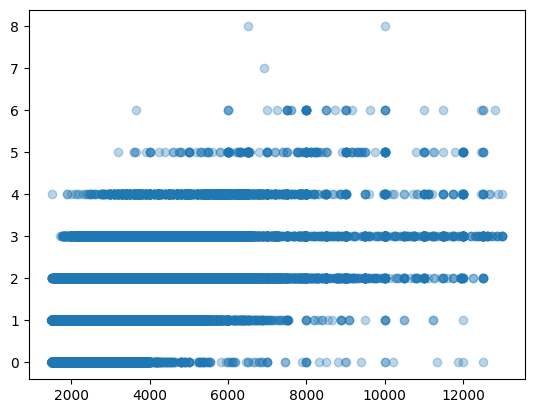

In [391]:
plt.scatter(df['price'], df['bedrooms'], alpha=0.3)
plt.show()

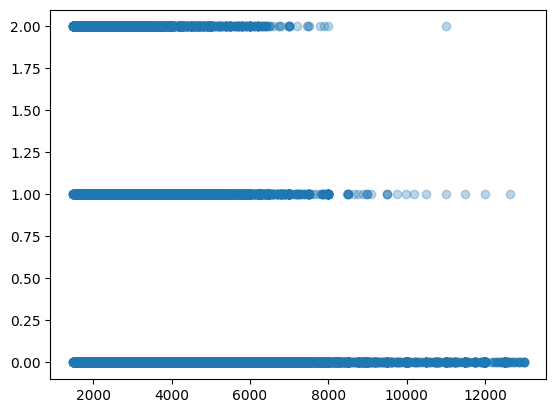

In [392]:
plt.scatter(df['price'], df['interest_level'], alpha=0.3)
plt.show()

# Generate features

You may create all features you want. For example, you may add 3 new features, which are squared: 'bathrooms_squared’, 'bedrooms_squared’, ‘'interest_level_squared'. Plot a correlation matrix with new features. Are new features more correlated with target then basic features?

In [393]:
print("New features:")
updated_df = df
updated_df['bathrooms_sq']= updated_df['bathrooms'] ** 2
updated_df['bedrooms_sq']= updated_df['bedrooms'] ** 2
updated_df['interest_level_sq']= updated_df['interest_level'] ** 2
square_correlation = df[['bathrooms_sq', 'bedrooms_sq', 'interest_level_sq', 'price']].corr()
print(square_correlation)

print("\nBasic features:")
print(correlation_matrix)

New features:
                   bathrooms_sq  bedrooms_sq  interest_level_sq     price
bathrooms_sq           1.000000     0.540462          -0.075253  0.646949
bedrooms_sq            0.540462     1.000000           0.013757  0.544612
interest_level_sq     -0.075253     0.013757           1.000000 -0.182283
price                  0.646949     0.544612          -0.182283  1.000000

Basic features:
                bathrooms  bedrooms  interest_level     price
bathrooms        1.000000  0.533446       -0.082573  0.670808
bedrooms         0.533446  1.000000        0.027293  0.547310
interest_level  -0.082573  0.027293        1.000000 -0.199652
price            0.670808  0.547310       -0.199652  1.000000


**Answer:** Lack of correlation became more obvious, while correlation remains the same.

# Now you need to train 3 models: linear regression, decision tree and native model. 

**i.** Result table. Create two empty pandas DataFrames with columns ‘model’, ‘train’, ‘test’. 

In [396]:
result_MAE = pd.DataFrame(columns=['model', 'train', 'test'])
result_RMSE = pd.DataFrame(columns=['model', 'train', 'test'])

In [394]:
x = df[['bathrooms', 'bedrooms', 'interest_level']]
y = df[['price']]

# split data into train and test samples
train_x, test_x, train_y, test_y = model_selection.train_test_split(x, y, test_size=0.21, random_state=21)

# replace NaN with mean value
train_y.fillna(train_y.mean(), inplace=True)
test_y.fillna(test_y.mean(), inplace=True)

In [395]:
poly_features = preprocessing.PolynomialFeatures(degree=10)
train_poly = poly_features.fit_transform(train_x)
test_poly = poly_features.fit_transform(test_x)

## Linear Regression

**a.** Initialize linear regression from sklearn without parameters.

In [397]:
linreg = linear_model.LinearRegression()

**b.** Fit your model and make predict on train and test features. Save it as new columns in data

In [417]:
linreg.fit(train_poly, train_y)
train_prediction = linreg.predict(train_poly)
test_prediction = linreg.predict(test_poly)

**c.** Calculate MAE (Mean Absolute Error) on train and test targets

In [399]:
mae_train = metrics.mean_absolute_error(train_y, train_prediction)
mae_test = metrics.mean_absolute_error(test_y, test_prediction)

**d.** Calculate RMSE (Root Mean Square Error) on train and test targets

In [400]:
rmse_train = metrics.root_mean_squared_error(train_y, train_prediction)
rmse_test = metrics.root_mean_squared_error(test_y, test_prediction)

**e.** Insert your metrics into tables result_MAE and result_RMSE with model name ‘linear_regression’

In [401]:
result_MAE.loc[0] = ['linear_regression', mae_train, mae_test]
result_MAE

,model,train,test
0,linear_regression,749.364149,1876.464733


In [402]:
result_RMSE.loc[0] = ['linear_regression', rmse_train, rmse_test]
result_RMSE

,model,train,test
0,linear_regression,1084.539583,79497.139392


## Decision Tree

**a.** Initialize decision tree regressor from sklearn with fixed random_state=42

In [403]:
tree_regressor = tree.DecisionTreeRegressor(random_state=42)

**b.** Fit it on train features and train targe and make predict on train and test features. Save it as new column in data

In [404]:
tree_regressor.fit(train_poly, train_y)
tree_train_prediction = tree_regressor.predict(train_poly)
tree_test_prediction = tree_regressor.predict(test_poly)

**c.** Calculate MAE (Mean Absolute Error) on train and test targets

In [405]:
tree_mae_train = metrics.mean_absolute_error(train_y, tree_train_prediction)
tree_mae_test = metrics.mean_absolute_error(test_y, tree_test_prediction)

**d.** Calculate RMSE (Root Mean Square Error) on train and test targets

In [418]:
tree_rmse_train = metrics.root_mean_squared_error(train_y, tree_train_prediction)
tree_rmse_test = metrics.root_mean_squared_error(test_y, tree_test_prediction)

**e.** Insert your metrics into tables result_MAE and result_RMSE with model name ‘decision_tree’

In [419]:
result_MAE.loc[1] = ['decision_tree', tree_mae_train, tree_mae_test]
result_MAE

,model,train,test
0,linear_regression,749.364149,1876.464733
1,decision_tree,749.045725,754.926240
2,native_mean,1110.790420,1112.314156
3,native_median,1067.279556,1068.343377


In [420]:
result_RMSE.loc[1] = ['decision_tree', tree_rmse_train, tree_rmse_test]
result_RMSE

,model,train,test
0,linear_regression,1084.539583,79497.139392
1,decision_tree,1084.185110,1098.556607
2,native_mean,1570.474038,1564.846167
3,native_median,1605.966848,1603.879555


## Native models

**a.** Calculate mean and median of ‘price’ on train and test data and create a columns with these values

In [421]:
train_df = pd.DataFrame(train_y)
train_df['mean'] = train_df['price'].mean()
train_df['median'] = train_df['price'].median()

test_df = pd.DataFrame(test_y)
test_df['mean'] = test_df['price'].mean()
test_df['median'] = test_df['price'].median()

**b.** Calculate MAE on train and test targets between your target and calculated mean and median values

In [422]:
mean_mae_train = metrics.mean_absolute_error(train_y, train_df['mean'])
mean_mae_test = metrics.mean_absolute_error(test_y, test_df['mean'])

median_mae_train = metrics.mean_absolute_error(train_y, train_df['median'])
median_mae_test = metrics.mean_absolute_error(test_y, test_df['median'])

**c.** Calculate RMSE on train and test targets between your target and calculated mean and median values

In [423]:
mean_rmse_train = metrics.root_mean_squared_error(train_y, train_df['mean'])
mean_rmse_test = metrics.root_mean_squared_error(test_y, test_df['mean'])

median_rmse_train = metrics.root_mean_squared_error(train_y, train_df['median'])
median_rmse_test = metrics.root_mean_squared_error(test_y, test_df['median'])

**d.** Insert your metrics into tables result_MAE and result_RMSE with model names ‘native_mean’ and ‘native_median’

In [424]:
result_MAE.loc[2] = ['native_mean', mean_mae_train, mean_mae_test]
result_MAE.loc[3] = ['native_median', median_mae_train, median_mae_test]

result_RMSE.loc[2] = ['native_mean', mean_rmse_train, mean_rmse_test]
result_RMSE.loc[3] = ['native_median', median_rmse_train, median_rmse_test]

In [425]:
result_MAE

,model,train,test
0,linear_regression,749.364149,1876.464733
1,decision_tree,749.045725,754.926240
2,native_mean,1110.790420,1112.314156
3,native_median,1067.279556,1068.343377


In [426]:
result_RMSE

,model,train,test
0,linear_regression,1084.539583,79497.139392
1,decision_tree,1084.185110,1098.556607
2,native_mean,1570.474038,1564.846167
3,native_median,1605.966848,1603.879555


**Answer**: Desicion tree seems to be the best model in this case: the results on train and test samples do not differ much.